# Convolutional Neural Network

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# La méthode d'applatir les images oublie les relations spatiale entre les pixels : Elle perd l'information dont à ne pas utiliser
# Utiliser plutot les réseaux de neuronnes convolutionnels
# Le CNN permet d'extraire les caractéristiques imporatante d'une image :
# 1) Quelque soit la position de l'objet sur l'image
# 2) Caractéristiques utiles
# ==> Par les filtres

# Opération de convolution

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving salon.jpg to salon.jpg
User uploaded file "salon.jpg" with length 58748 bytes


In [ ]:
import cv2
import numpy as np

In [ ]:
def processImage(image):
  image = cv2.imread(image)
  image = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
  return image

def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [ ]:
image = processImage('salon.jpg')

array([[239, 223, 219, ..., 182, 182, 182],
       [239, 223, 219, ..., 182, 182, 182],
       [239, 222, 218, ..., 182, 182, 182],
       ...,
       [239, 233, 240, ..., 175, 174, 176],
       [241, 232, 239, ..., 170, 172, 174],
       [242, 232, 239, ..., 171, 176, 178]], dtype=uint8)
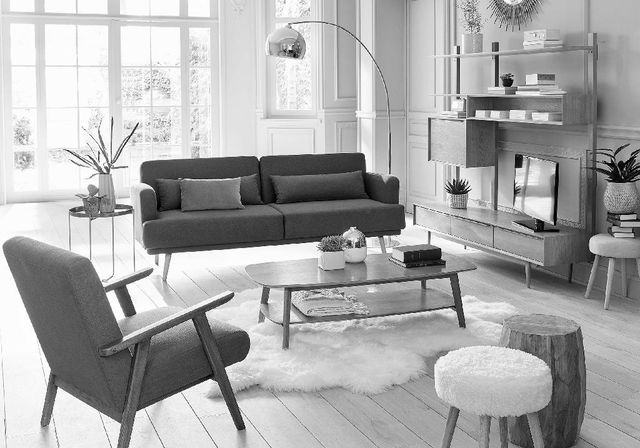

In [ ]:
image

In [ ]:
filtre_horizontal = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]

])
filtre_horizontal

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [ ]:
output = convolve2D(image, filtre_horizontal, padding=2)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 239. ... 182.   0.   0.]
 ...
 [  0.   0. 242. ... 178.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


In [ ]:
cv2.imwrite('salon_horizontal.jpg', output)

True

In [ ]:
filtre_vertical = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])
filtre_vertical

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [ ]:
output = convolve2D(image, filtre_vertical, padding=2)
cv2.imwrite('salon_vertical.jpg', output)

[[  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0. 239. ... 182.   0.   0.]
 ...
 [  0.   0. 242. ... 178.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


True

# Padding et pooling

In [ ]:
# La padding : c'est pour garder la meme taille de l'image aprés l'application de l'opération de convolution
# Le pooling c'est le faite de garder les memes caractéristiques de l'image en réduisant sa taille ( comme si on a compressé l'image, en gardant le maximum d'infos à l intérieur)
# Le max-pooling : Prendre la valeur du pixel le plus grand

# La Couche Conv2D avec Tensorflow


In [ ]:
import tensorflow as tf

In [ ]:
data = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [ ]:
training_images.shape

(60000, 28, 28)

In [ ]:
training_images = training_images.reshape((60000, 28, 28, 1))

In [ ]:
training_images.shape

(60000, 28, 28, 1)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
test_images.shape

(10000, 28, 28, 1)

# Modeling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Définir le modèle
model = Sequential()

# Définir la couche CNN pour l'extraction des caractéristiques
# padding="valid" | "same"
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="valid", activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

# Applatir
model.add(Flatten())

# Réseaux de neurones Dense
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

# Afficher le résumé du modèle
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
10*64 # Pour le filtre (3,3) on a 9 valeurs + la valeur du biais

640

In [ ]:
64*(64*9)+64

36928

In [ ]:
from tensorflow.keras.utils import plot_model

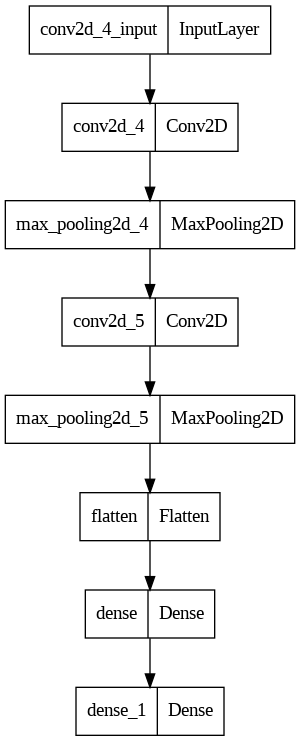

In [ ]:
 plot_model(model)

# Entrainement d'un Modèle CNN


In [ ]:
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                                               monitor="val_accuracy",
                                               mod="max",
                                               save_best_only=True)

stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
h = model.fit(training_images, training_labels,
              epochs=50,
              validation_data=(test_images, test_labels),
              callbacks=[model_ckp, stop])

Epoch 1/50
1875/1875 [==============================] - 98s 52ms/step - loss: 0.4377 - accuracy: 0.8405 - val_loss: 0.3555 - val_accuracy: 0.8711
Epoch 2/50
   3/1875 [..............................] - ETA: 1:11 - loss: 0.3488 - accuracy: 0.8750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 91s 48ms/step - loss: 0.2942 - accuracy: 0.8914 - val_loss: 0.2942 - val_accuracy: 0.8914
Epoch 3/50
1875/1875 [==============================] - 91s 49ms/step - loss: 0.2465 - accuracy: 0.9095 - val_loss: 0.2719 - val_accuracy: 0.8994
Epoch 4/50
1875/1875 [==============================] - 89s 47ms/step - loss: 0.2145 - accuracy: 0.9201 - val_loss: 0.2738 - val_accuracy: 0.8989
Epoch 5/50
1875/1875 [==============================] - 92s 49ms/step - loss: 0.1883 - accuracy: 0.9301 - val_loss: 0.2720 - val_accuracy: 0.9051
Epoch 6/50
1875/1875 [==============================] - 91s 48ms/step - loss: 0.1659 - accuracy: 0.9365 - val_loss: 0.2530 - val_accuracy: 0.9121
Epoch 7/50
1875/1875 [==============================] - 88s 47ms/step - loss: 0.1453 - accuracy: 0.9452 - val_loss: 0.2684 - val_accuracy: 0.9152
Epoch 8/50
1875/1875 [==============================] - 97s 52ms/step - loss: 0.1264 - accuracy: 0.9517 - val_loss: 0.2849 - val_accura

# Projet 01: Classification d'objets recyclables ou non

In [2]:
# Pour la derniére couche du réseau de neuronnes : si on a 2 classes
# on peut utiliser le "sigmoid" au lieu du "softmax"

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
!ls '/gdrive'

MyDrive


In [5]:
fichier_archive = '/gdrive/My Drive/learn_deep_learning/data/archive.zip'

In [6]:
! unzip '/gdrive/My Drive/learn_deep_learning/data/archive.zip'

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATAS

In [7]:
import os

In [8]:
data_dir = "DATASET"

In [9]:
train_dir = os.path.join(data_dir, "TRAIN")
test_dir = os.path.join(data_dir, "TEST")

In [10]:
os.listdir(train_dir)

['O', 'R']

In [11]:
os.listdir(test_dir)

['O', 'R']

In [12]:
train_r_dir = os.path.join(train_dir, "R")
train_o_dir = os.path.join(train_dir, "O")

In [13]:
# os.listdir(train_r_dir)

In [14]:
print(len(os.listdir(train_r_dir)))
print(len(os.listdir(train_o_dir)))

9999
12565


Visualiser quelques exemples d'Images


In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [16]:
r_index = 5680
o_index = 1496

In [17]:
recyclable_imgs = [os.path.join(train_r_dir, filename) for filename in os.listdir(train_r_dir)]
organic_imgs = [os.path.join(train_o_dir, filename) for filename in os.listdir(train_o_dir)]

In [18]:
recyclable_imgs[r_index]

'DATASET/TRAIN/R/R_6025.jpg'

In [19]:
organic_imgs[o_index]

'DATASET/TRAIN/O/O_7882.jpg'

In [20]:
img_r = mpimg.imread(recyclable_imgs[r_index])
img_o = mpimg.imread(organic_imgs[o_index])

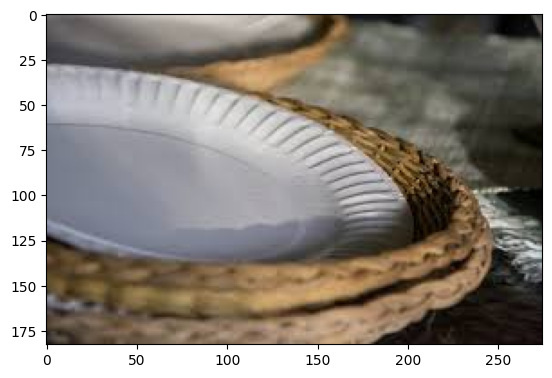

In [21]:
plt.imshow(img_r)

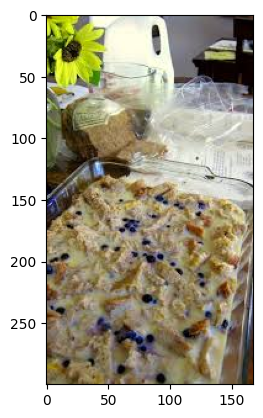

In [22]:
plt.imshow(img_o)

# Charger les Images avec ImageDataGenerator


ImageDataGenerator

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
train_data_generator = ImageDataGenerator(rescale=1/255.0)
test_data_generator = ImageDataGenerator(rescale=1/255.0)

In [25]:
train_dir

'DATASET/TRAIN'

In [26]:
train_generator = train_data_generator.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224), # standariser la taille des images
    batch_size = 32, # A chaque entrainement on a 32 images
    class_mode = 'binary'
)

test_generator = test_data_generator.flow_from_directory(
    directory = test_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [27]:
batch_images, batch_labels = next(iter(train_generator))

In [28]:
batch_images.shape

(32, 224, 224, 3)

In [29]:
batch_labels

array([0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1.],
      dtype=float32)

In [30]:
batch_labels.shape

(32,)

In [31]:
train_generator.class_indices

{'O': 0, 'R': 1}

# Entrainement du Modèle


In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Définir le modèle
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

# Applatir
model.add(Flatten())

# Réseaux de neurones Dense
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

# Afficher le résumé du modèle
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [33]:
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                                               monitor="val_accuracy",
                                               mod="max",
                                               save_best_only=True)

stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

In [34]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=["accuracy"]
              )

In [35]:
h = model.fit(train_generator,
              epochs=50,
              validation_data=test_generator,
              callbacks=[model_ckp, stop])

Epoch 1/50
706/706 [==============================] - 57s 72ms/step - loss: 0.4384 - accuracy: 0.8028 - val_loss: 0.3397 - val_accuracy: 0.8735
Epoch 2/50
  1/706 [..............................] - ETA: 1:15 - loss: 0.3151 - accuracy: 0.8438

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


706/706 [==============================] - 45s 64ms/step - loss: 0.3888 - accuracy: 0.8329 - val_loss: 0.4131 - val_accuracy: 0.8233
Epoch 3/50
706/706 [==============================] - 46s 65ms/step - loss: 0.3613 - accuracy: 0.8485 - val_loss: 0.3430 - val_accuracy: 0.8651
Epoch 4/50
706/706 [==============================] - 46s 65ms/step - loss: 0.3380 - accuracy: 0.8603 - val_loss: 0.2980 - val_accuracy: 0.8854
Epoch 5/50
706/706 [==============================] - 45s 63ms/step - loss: 0.3219 - accuracy: 0.8660 - val_loss: 0.2800 - val_accuracy: 0.8870
Epoch 6/50
706/706 [==============================] - 44s 63ms/step - loss: 0.3088 - accuracy: 0.8749 - val_loss: 0.2887 - val_accuracy: 0.8894
Epoch 7/50
706/706 [==============================] - 42s 60ms/step - loss: 0.2999 - accuracy: 0.8776 - val_loss: 0.3171 - val_accuracy: 0.8770
Epoch 8/50
706/706 [==============================] - 47s 67ms/step - loss: 0.2891 - accuracy: 0.8814 - val_loss: 0.2797 - val_accuracy: 0.8862
Epo

# Création d'une Application Streamlit pour la Poubelle Intelligente


# Data Augmentation

In [37]:
# Avant augmentation
train_data_generator = ImageDataGenerator(rescale=1/255.0)
test_data_generator = ImageDataGenerator(rescale=1/255.0)

# Aprés augmentation (Juste pour les données de test)
train_data_generator = ImageDataGenerator(rescale=1/255.0,
                                          rotation_range = 40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest')
test_data_generator = ImageDataGenerator(rescale=1/255.0)

In [38]:
train_generator = train_data_generator.flow_from_directory(
    directory = train_dir,
    target_size = (224, 224), # standariser la taille des images
    batch_size = 32, # A chaque entrainement on a 32 images
    class_mode = 'binary'
)

test_generator = test_data_generator.flow_from_directory(
    directory = test_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Définir le modèle
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

# Applatir
model.add(Flatten())

# Réseaux de neurones Dense
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))

# Afficher le résumé du modèle
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 128)      

In [42]:
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="aug_model.h5",
                                               monitor="val_accuracy",
                                               mod="max",
                                               save_best_only=True)

stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3)

In [43]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=["accuracy"]
              )

In [44]:
h = model.fit(train_generator,
              epochs=50,
              validation_data=test_generator,
              callbacks=[model_ckp, stop])

Epoch 1/50
706/706 [==============================] - 296s 416ms/step - loss: 0.4620 - accuracy: 0.7878 - val_loss: 0.3651 - val_accuracy: 0.8544
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


706/706 [==============================] - 284s 402ms/step - loss: 0.4158 - accuracy: 0.8177 - val_loss: 0.3483 - val_accuracy: 0.8516
Epoch 3/50
706/706 [==============================] - 285s 404ms/step - loss: 0.3977 - accuracy: 0.8268 - val_loss: 0.3420 - val_accuracy: 0.8599
Epoch 4/50
706/706 [==============================] - 320s 453ms/step - loss: 0.3816 - accuracy: 0.8366 - val_loss: 0.3336 - val_accuracy: 0.8595
Epoch 5/50
706/706 [==============================] - 304s 431ms/step - loss: 0.3679 - accuracy: 0.8420 - val_loss: 0.3021 - val_accuracy: 0.8754
Epoch 6/50
706/706 [==============================] - 312s 442ms/step - loss: 0.3597 - accuracy: 0.8479 - val_loss: 0.3151 - val_accuracy: 0.8754
Epoch 7/50
706/706 [==============================] - 323s 456ms/step - loss: 0.3495 - accuracy: 0.8529 - val_loss: 0.3534 - val_accuracy: 0.8675
Epoch 8/50
706/706 [==============================] - 321s 455ms/step - loss: 0.3423 - accuracy: 0.8553 - val_loss: 0.3432 - val_accura

# Transfert Learning

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 55, 55, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 128)      

Extraction de caractéristiques

In [46]:
from tensorflow.keras.applications import vgg16

In [47]:
pretrained_model = vgg16.VGG16(include_top=True, # include_top == la partie Dense
            weights='imagenet',
            input_shape=(224,224,3)
            )

553467096/553467096 [==============================] - 7s 0us/step


In [48]:
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [49]:
pretrained_model = vgg16.VGG16(include_top=False, # exclure la partie Dense
            weights='imagenet',
            input_shape=(224,224,3)
            )

58889256/58889256 [==============================] - 0s 0us/step


In [50]:
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [51]:
# (32, 224, 224, 3) ==> (32, 7, 7, 512) 512 filtres

# API fonctionnelle de tensorflow

In [52]:
# Flexible
inputs = tf.keras.Input(shape=(224, 244, 3))
x = Conv2D(filters=32, kernel_size=(3, 3))(inputs)
print()
x = MaxPooling2D((2, 2))(x)
outputs = Flatten()(x)

In [53]:
model = tf.keras.Model(inputs, outputs)

In [54]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 244, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 222, 242, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 121, 32)      0         
 ng2D)                                                           
                                                                 
 flatten_3 (Flatten)         (None, 429792)            0         
                                                                 
Total params: 896 (3.50 KB)
Trainable params: 896 (3.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Transfert Learning pour l'Extraction des caractéristiques sur les Images


## Utilisation des filtres de VGG 16

In [55]:
pretrained_model.trainable = False
# càd on n'entraine pas les filtres du modéle du base


In [59]:
inputs = tf.keras.Input(shape=(224, 244, 3))
x = pretrained_model(inputs, training=False)
x = Flatten()(x) # 7*7*512
x = Dense(128, activation="relu")(x)
outputs = Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs)

In [60]:
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="final_model.h5",
                                               monitor="val_accuracy",
                                               mod="max",
                                               save_best_only=True)

stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=6)

In [61]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=["accuracy"]
              )

In [62]:
h = model.fit(train_generator,
              epochs=50,
              validation_data=test_generator,
              callbacks=[model_ckp, stop])

Epoch 1/50
706/706 [==============================] - 328s 453ms/step - loss: 0.3586 - accuracy: 0.8506 - val_loss: 0.3526 - val_accuracy: 0.8631
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


706/706 [==============================] - 321s 455ms/step - loss: 0.2906 - accuracy: 0.8849 - val_loss: 0.3137 - val_accuracy: 0.8802
Epoch 3/50
706/706 [==============================] - 316s 448ms/step - loss: 0.2674 - accuracy: 0.8927 - val_loss: 0.4552 - val_accuracy: 0.8456
Epoch 4/50
706/706 [==============================] - 309s 437ms/step - loss: 0.2536 - accuracy: 0.8990 - val_loss: 0.4169 - val_accuracy: 0.8595
Epoch 5/50
706/706 [==============================] - 311s 440ms/step - loss: 0.2464 - accuracy: 0.9022 - val_loss: 0.4583 - val_accuracy: 0.8444
Epoch 6/50
706/706 [==============================] - 309s 437ms/step - loss: 0.2414 - accuracy: 0.9049 - val_loss: 0.3375 - val_accuracy: 0.8774
Epoch 7/50
706/706 [==============================] - 304s 431ms/step - loss: 0.2345 - accuracy: 0.9088 - val_loss: 0.3286 - val_accuracy: 0.8786
Epoch 8/50
706/706 [==============================] - 313s 443ms/step - loss: 0.2298 - accuracy: 0.9095 - val_loss: 0.3221 - val_accura

## Fine Tuning

In [63]:
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [64]:
pretrained_model.layers

In [65]:
pretrained_model.trainable=True

In [66]:
pretrained_model.layers[:-4]

In [67]:
for layer in pretrained_model.layers[:-4]:
  layer.trainable=False

In [68]:
inputs = tf.keras.Input(shape=(224, 244, 3))
x = pretrained_model(inputs, training=False)
x = Flatten()(x) # 7*7*512
x = Dense(128, activation="relu")(x)
outputs = Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs, outputs)

In [69]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 244, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 25088)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               3211392   
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17926209 (68.38 MB)
Trainable params: 10290945 (39.26 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [70]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=["accuracy"]
              )

In [2]:
h = model.fit(train_generator,
              epochs=50,
              validation_data=test_generator,
              callbacks=[model_ckp, stop])

NameError: name 'model' is not defined